# 1D SFR comparison

In [1]:

import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from astropy import constants as const

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from scipy import interpolate
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# from astropy.cosmology import WMAP9, z_at_value
from astropy.cosmology import Planck18  as cosmo# Planck 2018
from astropy.cosmology import z_at_value

# from astropy.table import Table, Column
import os
import paths

import matplotlib
from pylab import *
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec

def Mchirp(m1, m2):
    chirp_mass = np.divide(np.power(np.multiply(m1, m2), 3./5.), np.power(np.add(m1, m2), 1./5.))
    return chirp_mass    
   
base_dir    = '/Users/lieke/surfdrive/Documents/RateMassRedshiftEvolution/'
save_loc    =  base_dir+'/plots/'
TNGlocation = '/Users/lieke/surfdrive/Documents/CompareCOMPAS/'
Martyna_data_dir = '/Users/lieke/surfdrive/Documents/SFRD_fit/src/data/SFRD_Z_z_data/'


############################
# Custom scripts
import get_ZdepSFRD as Z_SFRD


############################
##PLOT setttings
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('font', family='serif')
rc('text', usetex=True)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,20,20,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


max value 0.0883961314673647 solMass / (Mpc3 yr)  at x_max =  11.406496746978968 Gyr


/Users/lieke/surfdrive/Documents/SFRD_fit/src/scripts/get_ZdepSFRD.py:117: RuntimeWarning: invalid value encountered in true_divide
  dPdlogZ = dPdlogZ /norm[:,np.newaxis]


saving here /Users/lieke/surfdrive/Documents/RateMassRedshiftEvolution//plots/SFR_tlookback.pdf


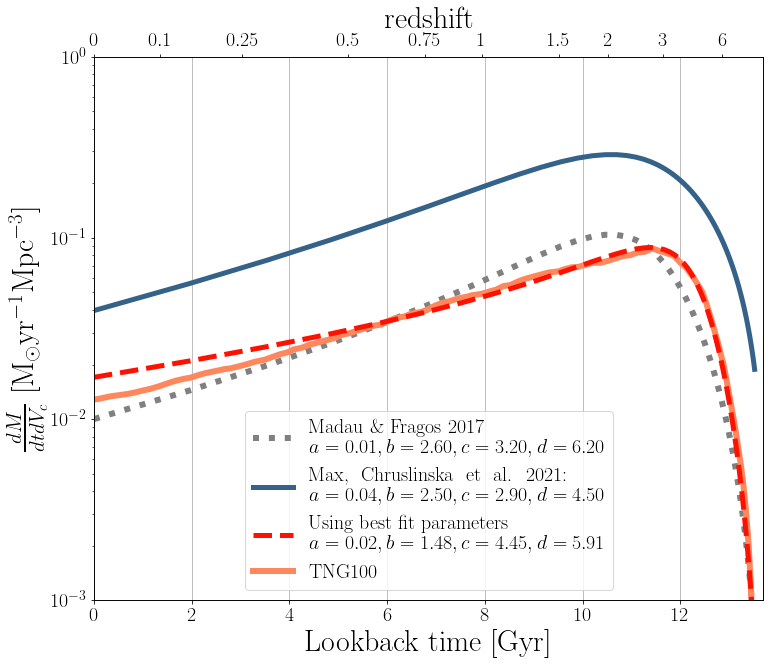

max value 0.0883961314673647 solMass / (Mpc3 yr)  at x_max =  2.7272727272727275


/Users/lieke/surfdrive/Documents/SFRD_fit/src/scripts/get_ZdepSFRD.py:117: RuntimeWarning: invalid value encountered in true_divide
  dPdlogZ = dPdlogZ /norm[:,np.newaxis]


saving here /Users/lieke/surfdrive/Documents/RateMassRedshiftEvolution//plots/SFR_redshift.pdf


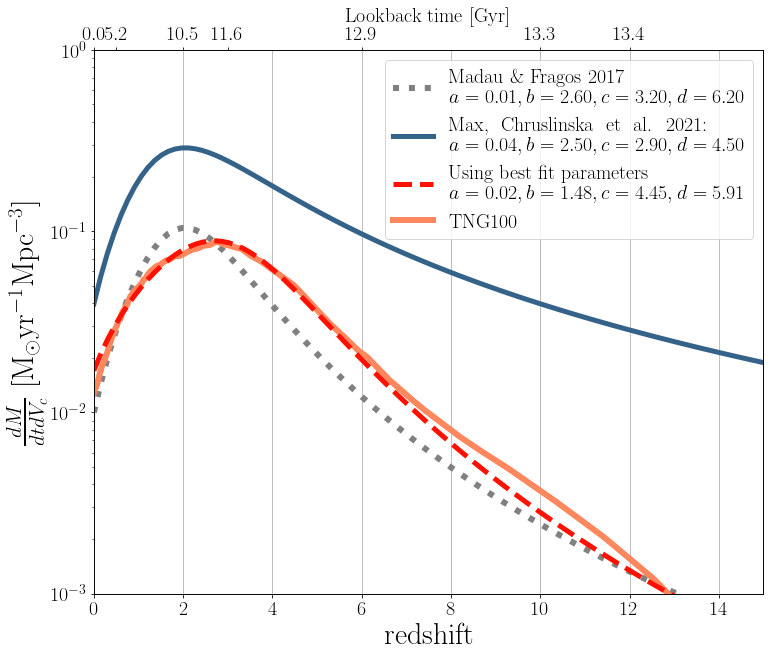

In [27]:

########################################################
# plot different SFRs
########################################################
def plot_SFR(sf_a = 0.017, sf_b = 1.481, sf_c = 4.452,  sf_d = 5.913,
             redshift_list  = np.linspace(0,15, num=100), x_redshift = True, tmin=0.0, tmax = 13.7):
    ########################################################
    # Start plotting
    fig, ax = plt.subplots(figsize=(12,10))

    if x_redshift:
        x1  = redshift_list
    else:
        x1 = cosmo.lookback_time(redshift_list)

#     #default M&D 14
#     ax.plot(x1, Z_SFRD.Madau_Dickinson2014(redshift_list), 
#              label = 'Madau $\&$ Dickinson 2014\n $a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (0.015,2.77,2.9,5.6)
#              , c = 'royalblue', ls = '--',lw=2)

    #default Madau & Fragos 17
    ax.plot(x1, Z_SFRD.Madau_Dickinson2014(redshift_list, a=0.01, b=2.6, c=3.2, d=6.2), 
             label = 'Madau $\&$ Fragos 2017\n $a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (0.01,2.6,3.2,6.2)
             , c = 'grey', ls = ':',lw=6)

#     #default Coen
#     ax.plot(x1, Z_SFRD.Madau_Dickinson2014(redshift_list, a=0.01, b=2.77, c=2.9, d=4.7), 
#              label = 'Neijssel et al 2019\n $a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (0.01,2.77,2.9,4.7)
#              , c = '#aacfdd', lw=5, ls = '--')

# 30*f14SBBiC

    # Some kind of max SFRD
    #Resembling thick brown line in Fig. 11 Chruslinska + 2021
    a_max, b_max, c_max, d_max = 0.04,2.5,2.9,4.5 
    ax.plot(x1, Z_SFRD.Madau_Dickinson2014(redshift_list, a=a_max, b=b_max, c=c_max, d=d_max), 
             label = 'Max, \ Chruslinska \ et \ al. \ 2021: \n $a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (a_max, b_max, c_max, d_max)
             , c = '#356288', lw=5, ls = '-')

    # BEST FIT
    try:
        y_vals = Z_SFRD.Madau_Dickinson2014(redshift_list, a=sf_a, b=sf_b, c=sf_c,  d=sf_d)
        ax.plot(x1, y_vals,label = 'Using best fit parameters \n $a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (sf_a,sf_b,sf_c, sf_d), 
                 c = '#fe1100', lw=5, ls = '--', zorder =10)
        print('max value', y_vals[np.argmax(y_vals)], ' at x_max = ', x1[np.argmax(y_vals)])
    except:
        print('you probably havent run the optimzation yet..')



    ######################################
    # read TNG data
    ######################################
    with h5.File(TNGlocation+"SFRMetallicityFromGasTNG100.hdf5", "r") as f:
        MetalBins     = f["MetalBins"][:]
        Lookbacktimes = f["Lookbacktimes"][:]
        BoxSfr        = f["Sfr"][:]
    # Convert SFR from sfr/box to sfr Mpc-3
    littleh  = 0.6774
    Rbox     = 75/littleh
    TNG_SFRD = BoxSfr / Rbox**3 *u.Mpc**-3
    TNG_SFRD = TNG_SFRD.value
    # the last value of Lookbacktimes = 0, which is problematic for z calculation
    redshifts_TNG = [z_at_value(cosmo.lookback_time,t*u.Gyr) for t in Lookbacktimes[:-1]] 
    redshifts_TNG.append(0) # put redshift zero back at the end
    redshifts_TNG = np.array(redshifts_TNG)
    redshifts_TNG_inc = redshifts_TNG[::-1]
    ##########################################
    # "observed" TNG SFR(z)
    ##########################################
    if x_redshift:
        xobs  = redshifts_TNG
    else:
        xobs = Lookbacktimes

    ax.plot(xobs, np.sum(TNG_SFRD,axis=1), label = 'TNG100', c = '#fe875d', lw=6)

    ##########################################
    # Checking normalization of what I will fit
    ##########################################################################
    center_Zbin = (MetalBins[:-1] + MetalBins[1:])/2.
    sfr = Z_SFRD.Madau_Dickinson2014(redshifts_TNG_inc, a=0.01, b=2.6, c=3.2,  d=6.2) # Msun year-1 Mpc-3 
    # Get dPdZ 
    dPdlogZ, metallicities, step_logZ, p_draw_metallicity = \
                    Z_SFRD.skew_metallicity_distribution(redshifts_TNG_inc, mu_z =-0.1, mu_0 =0.025,
                                                  omega_0=1.9,omega_z=1.9, alpha =-1.7, 
                                                  metals=center_Zbin)

    if x_redshift:
        x  = redshifts_TNG_inc
    else:
        x = cosmo.lookback_time(redshifts_TNG_inc)

    # For each redshift in the TNG data:
    for redshift_i in range(len(redshifts_TNG_inc)):
        SFRD = sfr[redshift_i] *dPdlogZ[redshift_i,:]#* step_logZ
#         plt.scatter(x[redshift_i], np.sum(SFRD), c = 'r')
        #
    ##########################################################################


    #### Age Universe Axis ####
    ax2 = ax.twiny()

    if x_redshift:
        ###################
        #Plotvalues
        ax.set_xlabel('$\mathrm{redshift}$', fontsize = 30)

        # Find loockback location for each of our redshifts
        redshift_tick_list = [0, 0.5, 2, 3, 6, 10, 12]#[0, 0.5, 1.0, 1.5, 2, 3, 6, 10, 12]
        # And annotate the tick labels :)
        ax2.set_xticks([z for z in redshift_tick_list])
        ax2.set_xticklabels(['${:.1f}$'.format(cosmo.lookback_time(z).value) for z in redshift_tick_list])
        ax2.set_xlabel('$\mathrm{Lookback \ time \ [Gyr]}$', fontsize = 20)

    else:
        ###################
        #Plotvalues
        ax.set_xlabel(r'$\mathrm{Lookback \ time \ [Gyr]}$', fontsize = 30)
        
        redshift_tick_list = [0,0.1, 0.25, 0.5, 0.75, 1.0,1.5, 2, 3, 6, ]
        # Find loockback location for each of our ages
        z_ticks = [cosmo.lookback_time(z) for z in redshift_tick_list]

        # And annotate the tick labels :)
        ax2.set_xticks([cosmo.lookback_time(z).value for z in redshift_tick_list])
        ax2.set_xticklabels(['${:g}$'.format(z) for z in redshift_tick_list])
        ax2.set_xlabel('$\mathrm{redshift}$', fontsize = 30)


    ##########################################################################
    ax.xaxis.grid(5) # vertical lines
    # Make sure top and bottom axis are lined up (have same limmits)
    ax.set_xlim(tmin, tmax)
    ax2.set_xlim(tmin, tmax)
    logy = True
    if logy:
        plt.yscale('log')
    ax.set_ylabel(r'$\frac{dM}{dt dV_c}$ $\mathrm{[M_{\odot} yr^{-1} Mpc^{-3}]}$', fontsize = 30)
    ax.set_ylim(1e-3, 1.)
    ax.legend()
    if x_redshift:
        print('saving here', save_loc + 'SFR_redshift'+'.pdf')
        plt.savefig(save_loc + 'SFR_redshift'+'.pdf',  bbox_inches='tight')
    else:
        print('saving here', save_loc + 'SFR_tlookback'+'.pdf')
        plt.savefig(save_loc + 'SFR_tlookback'+'.pdf',  bbox_inches='tight')
    
    plt.show()

    
    
# time axis
plot_SFR(sf_a = 0.017, sf_b = 1.481, sf_c = 4.452,  sf_d = 5.913,
         redshift_list  = np.linspace(0,15, num=100), x_redshift = False, tmin=0.0, tmax = 13.7)

# redshift axis
plot_SFR(sf_a = 0.017, sf_b = 1.481, sf_c = 4.452,  sf_d = 5.913,
         redshift_list  = np.linspace(0,15, num=100), x_redshift = True, tmin=0.0, tmax = 15)
